In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import category_encoders as ce


In [563]:
data = 'https://raw.githubusercontent.com/muhammadnabeelkhan/DWDM/main/classification/adult.csv'
df = pd.read_csv(data, header=None, sep=',', names=['Age', 'WorkClass', 'fnlwgt', 'Education', 'YearsOfEd',
                 'Marital', 'Occupation', 'Relation', 'Race', 'Gender', 'Gain', 'Loss', 'HPR', 'Country', 'income'])
df


,Age,WorkClass,fnlwgt,Education,YearsOfEd,Marital,Occupation,Relation,Race,Gender,Gain,Loss,HPR,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [564]:
# datatype for columns
df.dtypes


Age            int64
WorkClass     object
fnlwgt         int64
Education     object
YearsOfEd      int64
Marital       object
Occupation    object
Relation      object
Race          object
Gender        object
Gain           int64
Loss           int64
HPR            int64
Country       object
income        object
dtype: object

In [565]:
# display categorical variables
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical


['WorkClass',
 'Education',
 'Marital',
 'Occupation',
 'Relation',
 'Race',
 'Gender',
 'Country',
 'income']

In [566]:
# display numerical variables
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical


['Age', 'fnlwgt', 'YearsOfEd', 'Gain', 'Loss', 'HPR']

In [567]:
# missing value detection
df.isnull().sum()


Age           0
WorkClass     0
fnlwgt        0
Education     0
YearsOfEd     0
Marital       0
Occupation    0
Relation      0
Race          0
Gender        0
Gain          0
Loss          0
HPR           0
Country       0
income        0
dtype: int64

In [568]:
# missing value in categorical columns
df[categorical].isnull().mean()


WorkClass     0.0
Education     0.0
Marital       0.0
Occupation    0.0
Relation      0.0
Race          0.0
Gender        0.0
Country       0.0
income        0.0
dtype: float64

In [569]:
# view frequency counts of values in categorical variables
for var in categorical:
    print(df[var].value_counts())


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4

In [570]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')


WorkClass  contains  9  labels
Education  contains  16  labels
Marital  contains  7  labels
Occupation  contains  15  labels
Relation  contains  6  labels
Race  contains  5  labels
Gender  contains  2  labels
Country  contains  42  labels
income  contains  2  labels


In [571]:
# view the numerical variables
df[numerical].head()


,Age,fnlwgt,YearsOfEd,Gain,Loss,HPR
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [572]:
# check missing values in numerical variables
df[numerical].isnull().sum()


Age          0
fnlwgt       0
YearsOfEd    0
Gain         0
Loss         0
HPR          0
dtype: int64

In [573]:
# replacing ? with nan
df = df.replace('\?', np.nan, regex=True)


In [574]:
# filling with most common values
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [575]:
# declare feature vector and target variable
X = df.drop(['income'], axis=1)
y = df['income']


In [576]:
# function for outlier detection
def detect_outliers(_df, _debug=False):
    """
    Takes a dataframe df of numerical features and returns a dict of column names and outlier counts.
    """
    outlier_dict = {}
    outlier_list = []
    for col in _df:
        Q1 = np.percentile(_df[col], 25)
        Q3 = np.percentile(_df[col], 75)
        IQR = Q3 - Q1
        outlier_list = (_df[(_df[col] < Q1 - 1.5 * IQR) |
                        (_df[col] > Q3 + 1.5 * IQR)].index)
        if _debug:
            print(col, ' contains ', len(outlier_list), '(', len(
                outlier_list)/len(_df[col]), ') outliers, out of ', len(_df[col]))
        outlier_dict[col] = outlier_list
    return outlier_dict


In [577]:
# create a dataframe of outliers
outlier_df = detect_outliers(df[numerical], _debug=True)


Age  contains  143 ( 0.004391757009919842 ) outliers, out of  32561
fnlwgt  contains  992 ( 0.030465894782101287 ) outliers, out of  32561
YearsOfEd  contains  1198 ( 0.036792481803384416 ) outliers, out of  32561
Gain  contains  2712 ( 0.08328982525106723 ) outliers, out of  32561
Loss  contains  1519 ( 0.0466509013850926 ) outliers, out of  32561
HPR  contains  9008 ( 0.27664998003746816 ) outliers, out of  32561


In [578]:
# train test split
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train


,Age,WorkClass,fnlwgt,Education,YearsOfEd,Marital,Occupation,Relation,Race,Gender,Gain,Loss,HPR,Country
19749,34,Self-emp-not-inc,56460,HS-grad,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States
1216,48,Self-emp-not-inc,243631,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States
27962,23,State-gov,56402,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States
23077,56,Local-gov,255406,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,Private,359461,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
5390,31,Private,147215,12th,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States
860,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
15795,50,Self-emp-not-inc,54261,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States


In [579]:
# encoding categorical variables
cols = ['WorkClass', 'Education', 'Marital',
        'Occupation', 'Relation', 'Race', 'Gender', 'Country']
encoder = ce.OneHotEncoder(cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [580]:
X_train.head()


,Age,WorkClass_1,WorkClass_2,WorkClass_3,WorkClass_4,WorkClass_5,WorkClass_6,WorkClass_7,WorkClass_8,fnlwgt,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
19749,34,1,0,0,0,0,0,0,0,56460,...,0,0,0,0,0,0,0,0,0,0
1216,48,1,0,0,0,0,0,0,0,243631,...,0,0,0,0,0,0,0,0,0,0
27962,23,0,1,0,0,0,0,0,0,56402,...,0,0,0,0,0,0,0,0,0,0
23077,56,0,0,1,0,0,0,0,0,255406,...,0,0,0,0,0,0,0,0,0,0
10180,17,0,0,0,1,0,0,0,0,297246,...,0,0,0,0,0,0,0,0,0,0


In [581]:
# get new generated columns name
cols = X_train.columns


In [582]:
# Robust Scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [583]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)


In [584]:
X_train


,Age,WorkClass_1,WorkClass_2,WorkClass_3,WorkClass_4,WorkClass_5,WorkClass_6,WorkClass_7,WorkClass_8,fnlwgt,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
0,-0.15,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.018859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.55,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.547177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.70,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.019344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.95,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.645697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.516311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22788,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.259524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22789,-0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22790,0.65,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.037258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [585]:
# make a dict of models name and accuracy
models = {'Naive Bayes': GaussianNB(), 'Logistic Regression': LogisticRegression(random_state=0, solver="newton-cg"), 'Decision Tree Entropy':
          DecisionTreeClassifier(criterion='entropy', random_state=0), 'Decision Tree Gini': DecisionTreeClassifier(criterion='gini', random_state=0)}
colors = {'Naive Bayes': 'red', 'Logistic Regression': 'green', 'Decision Tree Entropy': 'blue', 'Decision Tree Gini': 'yellow'}
accuracy = {'Naive Bayes': 0, 'Logistic Regression': 0,
            'Decision Tree Entropy': 0, 'Decision Tree Gini': 0}
auc = {'Naive Bayes': 0, 'Logistic Regression': 0, 'Decision Tree Entropy': 0, 'Decision Tree Gini': 0}
matrix = {'Naive Bayes': 0, 'Logistic Regression': 0, 'Decision Tree Entropy': 0, 'Decision Tree Gini': 0}


Naive Bayes  Accuracy:  0.8004913501893746
Naive Bayes Confusion matrix
[[5921 1534]
 [ 415 1899]]
Naive Bayes  Cross validated ROC AUC : 0.8936


Logistic Regression  Accuracy:  0.8521854846964889
Logistic Regression Confusion matrix
[[6948  507]
 [ 937 1377]]
Logistic Regression  Cross validated ROC AUC : 0.9058


Decision Tree Entropy  Accuracy:  0.8159484082301157
Decision Tree Entropy Confusion matrix
[[6524  931]
 [ 867 1447]]
Decision Tree Entropy  Cross validated ROC AUC : 0.7463


Decision Tree Gini  Accuracy:  0.8149247620022521
Decision Tree Gini Confusion matrix
[[6513  942]
 [ 866 1448]]
Decision Tree Gini  Cross validated ROC AUC : 0.7499




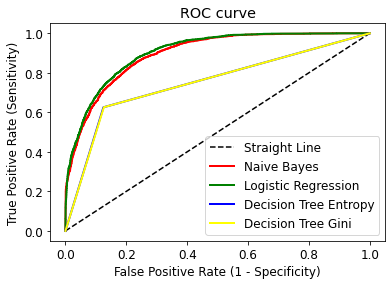

In [586]:
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# loop through the models and calculate accuracy
for name, model in models.items():
    # fit the model
    model.fit(X_train, y_train)
    # prediction
    y_pred = model.predict(X_test)
    # accuracy of the model
    accuracy[name] = accuracy_score(y_test, y_pred)
    print(name, ' Accuracy: ', accuracy[name])
    # Print the Confusion Matrix
    matrix[name] = confusion_matrix(y_test, y_pred)
    print(name, 'Confusion matrix')
    print(matrix[name])
    # store the predicted probabilities for class 1 - Probability of >50K
    y_pred1 = model.predict_proba(X_test)[:, 1]
    # plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=' >50K')
    plt.plot(fpr, tpr, linewidth=2, c=colors[name], label=name)
    # calculate cross-validated ROC AUC
    auc[name] = cross_val_score(
        model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    print(name, ' Cross validated ROC AUC : {:.4f}'.format(
        auc[name]))
    print('\n')

plt.gca().legend(('Straight Line', 'Naive Bayes','Logistic Regression','Decision Tree Entropy','Decision Tree Gini'), loc='lower right')
plt.show()


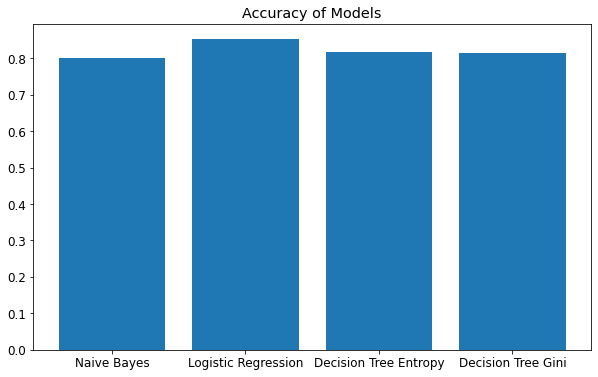

In [587]:
#plot accuracy of each model
plt.figure(figsize=(10, 6))
plt.title('Accuracy of Models')
data = accuracy
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.show()



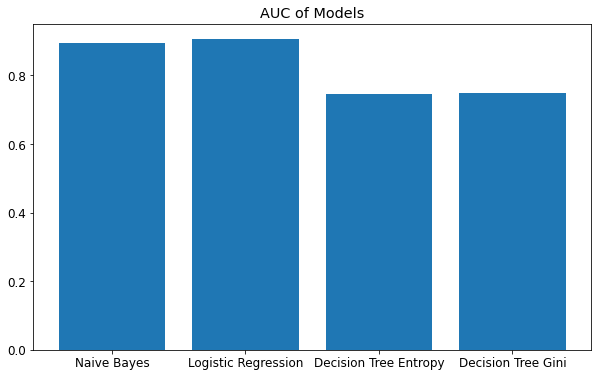

In [588]:
#plot auc of each model
plt.figure(figsize=(10, 6))
plt.title('AUC of Models')
data = auc
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.show()
